# Imports

In [1]:
using DataFrames
using CSV
using MLJ
using Flux
using Plots
using StatsBase
using MLJ: confusion_matrix

include("../../lib.jl")

ENV["LINES"]=30;

In [2]:
mkdir("./Figures")

LoadError: IOError: mkdir: file already exists (EEXIST)

# Datasets

In [3]:
data = CSV.read("data.csv")

,1,2,3,4,5,6,7,8,9,10,11
,Float64,Float64,Int64,Int64,Int64,Int64,Int64,Float64,Int64,Int64,Int64
1,3.919,2.6909,0,0,0,0,0,31.4,2,0,0
2,4.17,2.1144,0,0,0,0,0,30.8,1,1,0
3,3.932,3.2512,0,0,0,0,0,26.7,2,4,0
4,3.0,2.7098,0,0,0,0,0,20.0,0,2,0
5,4.236,3.3944,0,0,0,0,0,29.4,2,4,0
6,4.236,3.4286,0,0,0,0,0,28.6,2,4,0
7,5.0,5.0476,1,0,0,0,0,11.1,0,3,0
8,4.525,3.8301,0,0,0,0,0,31.6,3,2,0
9,4.596,3.0777,0,0,0,0,2,44.4,2,0,0


In [4]:
describe(data)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,1,4.78264,2.0,4.828,6.496,,,Float64
2,2,3.06951,0.8039,3.0463,9.1775,,,Float64
3,3,0.716588,0,0.0,12,,,Int64
4,4,0.042654,0,0.0,3,,,Int64
5,5,0.980095,0,0.0,36,,,Int64
6,6,0.290047,0,0.0,13,,,Int64
7,7,1.64645,0,1.0,18,,,Int64
8,8,37.0556,0.0,37.5,60.7,,,Float64
9,9,1.3763,0,1.0,24,,,Int64


Look at class labels to see if dataset is imbalanced

In [5]:
label_counts = countmap(data[:Class])

Dict{String,Int64} with 2 entries:
  "RB"  => 356
  "NRB" => 699

In [6]:
collect(label_counts[i] / size(data)[1] for i in keys(label_counts))

2-element Array{Float64,1}:
 0.33744075829383885
 0.6625592417061611

Get data ready for training

In [7]:
coerce!(data, :Class=>Multiclass)
schema(data)

┌─────────┬─────────────────────────────────┬───────────────┐
│ _.names │ _.types                         │ _.scitypes    │
├─────────┼─────────────────────────────────┼───────────────┤
│ 1       │ Float64                         │ Continuous    │
│ 2       │ Float64                         │ Continuous    │
│ 3       │ Int64                           │ Count         │
│ 4       │ Int64                           │ Count         │
│ 5       │ Int64                           │ Count         │
│ 6       │ Int64                           │ Count         │
│ 7       │ Int64                           │ Count         │
│ 8       │ Float64                         │ Continuous    │
│ 9       │ Int64                           │ Count         │
│ 10      │ Int64                           │ Count         │
│ 11      │ Int64                           │ Count         │
│ 12      │ Float64                         │ Continuous    │
│ 13      │ Float64                         │ Continuous    │
│ 14    

In [8]:
y, X = unpack(data, ==(:Class), colname->true)

(CategoricalValue{String,UInt32}["RB", "RB", "RB", "RB", "RB", "RB", "RB", "RB", "RB", "RB"  …  "NRB", "NRB", "NRB", "NRB", "NRB", "NRB", "NRB", "NRB", "NRB", "NRB"], 1055×41 DataFrame. Omitted printing of 33 columns
│ Row  │ 1       │ 2       │ 3     │ 4     │ 5     │ 6     │ 7     │ 8       │
│      │ Float64 │ Float64 │ Int64 │ Int64 │ Int64 │ Int64 │ Int64 │ Float64 │
├──────┼─────────┼─────────┼───────┼───────┼───────┼───────┼───────┼─────────┤
│ 1    │ 3.919   │ 2.6909  │ 0     │ 0     │ 0     │ 0     │ 0     │ 31.4    │
│ 2    │ 4.17    │ 2.1144  │ 0     │ 0     │ 0     │ 0     │ 0     │ 30.8    │
│ 3    │ 3.932   │ 3.2512  │ 0     │ 0     │ 0     │ 0     │ 0     │ 26.7    │
│ 4    │ 3.0     │ 2.7098  │ 0     │ 0     │ 0     │ 0     │ 0     │ 20.0    │
│ 5    │ 4.236   │ 3.3944  │ 0     │ 0     │ 0     │ 0     │ 0     │ 29.4    │
│ 6    │ 4.236   │ 3.4286  │ 0     │ 0     │ 0     │ 0     │ 0     │ 28.6    │
│ 7    │ 5.0     │ 5.0476  │ 1     │ 0     │ 0     │ 0     │ 0     │ 11.

Partition train and test data accoring to class labels

In [9]:
# data to use when trying to fit a single validation set
train, test = partition(eachindex(y), 0.7, shuffle=true, rng=123, stratify=values(data[:Class])) # gives 70:30 split

([465, 562, 278, 619, 161, 972, 782, 321, 537, 760  …  12, 913, 471, 13, 1006, 802, 112, 840, 744, 261], [196, 586, 245, 77, 1028, 432, 215, 987, 137, 411  …  975, 610, 886, 848, 731, 1024, 805, 500, 659, 415])

In [10]:
train_counts = countmap(data[train,:Class])
collect(train_counts[i] / size(train)[1] for i in keys(train_counts))

2-element Array{Float64,1}:
 0.33739837398373984
 0.6626016260162602

In [11]:
test_counts = countmap(data[test,:Class])
collect(test_counts[i] / size(test)[1] for i in keys(test_counts))

2-element Array{Float64,1}:
 0.33753943217665616
 0.6624605678233438

In [12]:
standardizer = Standardizer()
stand = machine(standardizer, X[train,:]) #only want to standardize on training distribution
fit!(stand)
X_stand = MLJ.transform(stand, X);

┌ Info: Training Machine{Standardizer} @670.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319


# Five Learning Algorithms

* Decision trees with some form of pruning
* Neural networks
* Boosting
* Support Vector Machines
* k-nearest neighbors


##### Testing
* Implement the algorithms
* Design two *interesting* classification problems. For the purposes of this assignment, a classification problem is just a set of training examples and a set of test examples.

In [13]:
models(matching(X,y))

6-element Array{NamedTuple{(:name, :package_name, :is_supervised, :docstring, :hyperparameter_ranges, :hyperparameter_types, :hyperparameters, :implemented_methods, :is_pure_julia, :is_wrapper, :load_path, :package_license, :package_url, :package_uuid, :prediction_type, :supports_online, :supports_weights, :input_scitype, :target_scitype, :output_scitype),T} where T<:Tuple,1}:
 (name = AdaBoostStumpClassifier, package_name = DecisionTree, ... )
 (name = ConstantClassifier, package_name = MLJModels, ... )
 (name = DecisionTreeClassifier, package_name = DecisionTree, ... )
 (name = DeterministicConstantClassifier, package_name = MLJModels, ... )
 (name = RandomForestClassifier, package_name = DecisionTree, ... )
 (name = RandomForestClassifier, package_name = ScikitLearn, ... )

In [14]:
@load NeuralNetworkClassifier verbosity=2

import MLJFlux 

┌ Info: Loading into module "Main": 
└ @ MLJModels /home/andrew/.julia/packages/MLJModels/mUBFt/src/loading.jl:70


✔
import MLJFlux ✔


NeuralNetworkClassifier(
    builder = Short(
            n_hidden = 0,
            dropout = 0.5,
            σ = NNlib.σ),
    finaliser = NNlib.softmax,
    optimiser = ADAM(0.001, (0.9, 0.999), IdDict{Any,Any}()),
    loss = Flux.crossentropy,
    epochs = 10,
    batch_size = 1,
    lambda = 0.0,
    alpha = 0.0,
    optimiser_changes_trigger_retraining = false) @274

## Neural networks
* Use favorite kind of network and training algorithm. 
* You may use networks of nodes with as many layers as you like and any activation function you see fit.

1. https://github.com/alan-turing-institute/MLJFlux.jl/blob/master/examples/boston.ipynb
1. https://github.com/alan-turing-institute/MLJFlux.jl
1. https://alan-turing-institute.github.io/MLJ.jl/dev/transformers/

In [15]:
# Define a custom network
mutable struct CustomNN <:MLJFlux.Builder
    n1 ::Int
end

In [16]:
function MLJFlux.build(nn::CustomNN, n_in, n_out)
    return Chain(
        Flux.Dense(n_in, nn.n1, σ),
        Flux.Dense(nn.n1, n_out, σ)
    )
end

In [17]:
layer1 = 80

80

In [18]:
batch_sz = 16;

In [19]:
max_epochs = 2000;

### No-preprocessing

In [20]:
nn = NeuralNetworkClassifier(builder=CustomNN(layer1))

NeuralNetworkClassifier(
    builder = CustomNN(
            n1 = 80),
    finaliser = NNlib.softmax,
    optimiser = ADAM(0.001, (0.9, 0.999), IdDict{Any,Any}()),
    loss = Flux.crossentropy,
    epochs = 10,
    batch_size = 1,
    lambda = 0.0,
    alpha = 0.0,
    optimiser_changes_trigger_retraining = false) @209

In [21]:
Net = machine(nn, X, y)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @209`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


Machine{NeuralNetworkClassifier{CustomNN,…}} @146 trained 0 times.
  args: 
    1:	Source @968 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @334 ⏎ `AbstractArray{Multiclass{2},1}`


In [22]:
nn.optimiser.eta = 0.001
nn.epochs = 60
nn.batch_size = batch_sz
nn.lambda = 0.01

0.01

In [23]:
fit!(Net, rows=train, verbosity=2)

┌ Info: Training Machine{NeuralNetworkClassifier{CustomNN,…}} @146.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
┌ Info: Loss is 0.6174
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 0.5807
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 0.5504
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 0.5292
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 0.5129
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 0.5006
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 0.4914
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 0.484
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 0.4782
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 0.473

Machine{NeuralNetworkClassifier{CustomNN,…}} @146 trained 1 time.
  args: 
    1:	Source @968 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @334 ⏎ `AbstractArray{Multiclass{2},1}`


In [24]:
nn.optimiser.eta = nn.optimiser.eta / 3
nn.epochs = nn.epochs + 40

100

In [25]:
fit!(Net, rows=train, verbosity=2)

┌ Info: Updating Machine{NeuralNetworkClassifier{CustomNN,…}} @146.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:320
┌ Info: Loss is 0.4204
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 0.4193
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 0.4191
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 0.4189
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 0.4187
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 0.4186
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 0.4184
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 0.4182
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 0.418
└ @ MLJFlux /home/andrew/.julia/packages/MLJFlux/rYILg/src/core.jl:95
┌ Info: Loss is 0.417

Machine{NeuralNetworkClassifier{CustomNN,…}} @146 trained 2 times.
  args: 
    1:	Source @968 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @334 ⏎ `AbstractArray{Multiclass{2},1}`


In [26]:
nn_acc = evaluate!(Net, resampling=CV(shuffle=true), measure=[cross_entropy, acc], verbosity=1)

Evaluating over 6 folds: 100%[=========================] Time: 0:00:14


┌───────────────┬───────────────┬────────────────────────────────────────────────┐
│ _.measure     │ _.measurement │ _.per_fold                                     │
├───────────────┼───────────────┼────────────────────────────────────────────────┤
│ cross_entropy │ 0.446         │ Float32[0.45, 0.45, 0.44, 0.439, 0.432, 0.463] │
│ acc           │ 0.865         │ [0.858, 0.858, 0.864, 0.875, 0.898, 0.84]      │
└───────────────┴───────────────┴────────────────────────────────────────────────┘
_.per_observation = [[[0.316, 0.337, ..., 1.05], [1.29, 1.25, ..., 0.356], [0.315, 0.314, ..., 0.319], [0.76, 0.368, ..., 1.29], [1.01, 0.39, ..., 0.358], [0.418, 1.24, ..., 0.315]], missing]
_.fitted_params_per_fold = [ … ]
_.report_per_fold = [ … ]


In [27]:
fitted_params(Net)

(chain = Chain(Chain(Dense(41, 80, σ), Dense(80, 2, σ)), softmax),)

In [28]:
report(Net)

(training_losses = Any[0.6350107f0, 0.62078077f0, 0.60927504f0, 0.596392f0, 0.5836051f0, 0.5685957f0, 0.552864f0, 0.53834724f0, 0.5267126f0, 0.51728207f0  …  0.42623112f0, 0.42599493f0, 0.4257624f0, 0.42553344f0, 0.42530817f0, 0.42508635f0, 0.42486772f0, 0.42465237f0, 0.42443994f0, 0.42423016f0],)

### With Preprocessing

Standardizing Inputs makes a huge difference.
Before, I could only barely break below 0.4 training loss, but by standardizing inputs, I can easily get near 0.3.

In [29]:
Net = machine(nn, X_stand, y)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @209`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


Machine{NeuralNetworkClassifier{CustomNN,…}} @976 trained 0 times.
  args: 
    1:	Source @027 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @745 ⏎ `AbstractArray{Multiclass{2},1}`


### Learning Curve

In [30]:
Net.model.epochs = max_epochs
fit!(Net, rows=train, verbosity=1, force=true)

┌ Info: Training Machine{NeuralNetworkClassifier{CustomNN,…}} @976.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
Optimising neural net:100%[=========================] Time: 0:00:31


Machine{NeuralNetworkClassifier{CustomNN,…}} @976 trained 1 time.
  args: 
    1:	Source @027 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @745 ⏎ `AbstractArray{Multiclass{2},1}`


In [36]:
nn_acc = evaluate!(Net, resampling=Holdout(), measure=[cross_entropy, acc], verbosity=1)

┌───────────────┬───────────────┬────────────────┐
│ _.measure     │ _.measurement │ _.per_fold     │
├───────────────┼───────────────┼────────────────┤
│ cross_entropy │ 0.473         │ Float32[0.473] │
│ acc           │ 0.839         │ [0.839]        │
└───────────────┴───────────────┴────────────────┘
_.per_observation = [[[0.313, 0.313, ..., 0.313]], missing]
_.fitted_params_per_fold = [ … ]
_.report_per_fold = [ … ]


In [37]:
vals = collect(0:5:max_epochs)
r = range(nn, :epochs, lower=1, upper=max_epochs, scale=:log10)

MLJBase.NumericRange(Int64, :epochs, ... )

In [38]:
curve = MLJ.learning_curve(Net, 
                        range=r, 
                        resampling=Holdout(fraction_train=0.7), 
#                         resampling=CV(nfolds=4), 
                        measure=cross_entropy, 
                        acceleration=CPUProcesses()
)

┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @023.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
┌ Info: Attempting to evaluate 28 models.
└ @ MLJTuning /home/andrew/.julia/packages/MLJTuning/Bbgvk/src/tuned_models.jl:494
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=Resampler{Holdout,…} @997`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 28 metamodels:   0%[>                        ]  ETA: N/A┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @224`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(Abstra

(parameter_name = "epochs",
 parameter_scale = :log10,
 parameter_values = [1, 2, 3, 4, 5, 6, 8, 11, 14, 18  …  189, 246, 319, 415, 539, 701, 911, 1184, 1539, 2000],
 measurements = [0.7326091527938843, 0.719550609588623, 0.7058663368225098, 0.6920397281646729, 0.6785441637039185, 0.6657504439353943, 0.6060373783111572, 0.5556014180183411, 0.5349774956703186, 0.5191981792449951  …  0.45828694105148315, 0.45744097232818604, 0.45737987756729126, 0.4571854770183563, 0.4537372887134552, 0.45832568407058716, 0.4612329602241516, 0.4578856825828552, 0.46304070949554443, 0.4692853093147278],)

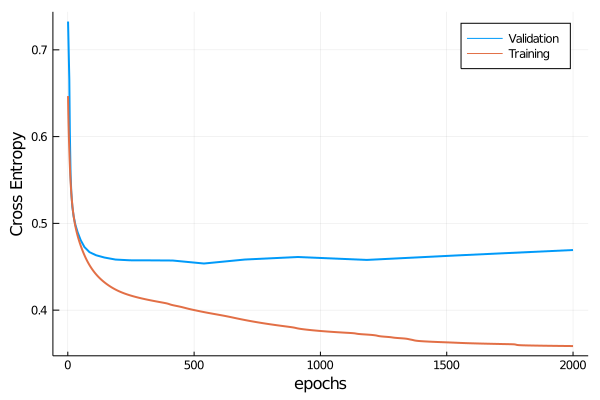

In [39]:
plot(curve.parameter_values,
     curve.measurements,
     xlab=curve.parameter_name,
     ylab="Cross Entropy",
     label="Validation", lw=2)
plot!(Net.report.training_losses, label="Training", lw=2)

In [40]:
a = round(nn.optimiser.eta, digits=5)
b = round(minimum(curve.measurements), digits=5)
best_epochs = curve.parameter_values[argmin(curve.measurements)]
a,b, best_epochs

(0.00033, 0.45374, 539)

In [42]:
fn = "Figures/LearningCurve_NN_hidden:$(layer1)_epochs:$(nn.epochs)_lr:$(a)_loss:$(b)_labmda:$(nn.lambda)"
png(replace(fn,'.' => ','))

### GridSearch for Hidden Layer Size 1

In [43]:
Net = machine(nn, X_stand, y)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @209`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


Machine{NeuralNetworkClassifier{CustomNN,…}} @522 trained 0 times.
  args: 
    1:	Source @985 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @588 ⏎ `AbstractArray{Multiclass{2},1}`


In [44]:
param1 = :epochs
param2 = :(builder.n1)
# param2 = :(builder.n2)

r1 = range(nn, param1, lower=10, upper=4000, scale=:log10)
# r1 = range(nn, param1, lower=1, upper=100, scale=:linear)
r2 = range(nn, param2, lower=10, upper=100, scale=:linear)

MLJBase.NumericRange(Int64, :(builder.n1), ... )

In [45]:
self_tuning_nn_model = TunedModel(model=nn,
                                    tuning=Grid(goal=64),
                                    resampling=Holdout(fraction_train=0.7), 
                                    measure=cross_entropy,
                                    acceleration=CPUThreads(),
                                    range=[r1, r2])

ProbabilisticTunedModel(
    model = NeuralNetworkClassifier(
            builder = CustomNN @981,
            finaliser = NNlib.softmax,
            optimiser = ADAM(0.0003333333333333333, (0.9, 0.999), IdDict{Any,Any}()),
            loss = Flux.crossentropy,
            epochs = 2000,
            batch_size = 16,
            lambda = 0.01,
            alpha = 0.0,
            optimiser_changes_trigger_retraining = false),
    tuning = Grid(
            goal = 64,
            resolution = 10,
            shuffle = true,
            rng = Random._GLOBAL_RNG()),
    resampling = Holdout(
            fraction_train = 0.7,
            shuffle = false,
            rng = Random._GLOBAL_RNG()),
    measure = cross_entropy(
            eps = 2.220446049250313e-16),
    weights = nothing,
    operation = MLJModelInterface.predict,
    range = MLJBase.NumericRange{Int64,MLJBase.Bounded,Symbol}[NumericRange{Int64,…} @681, NumericRange{Int64,…} @791],
    train_best = true,
    repeats = 1,
    

In [46]:
self_tuning_nn = machine(self_tuning_nn_model, X_stand, y)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=ProbabilisticTunedModel{Grid,…} @397`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


Machine{ProbabilisticTunedModel{Grid,…}} @521 trained 0 times.
  args: 
    1:	Source @156 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @844 ⏎ `AbstractArray{Multiclass{2},1}`


In [47]:
z = fit!(self_tuning_nn, rows=train)

┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @521.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
┌ Info: Attempting to evaluate 64 models.
└ @ MLJTuning /home/andrew/.julia/packages/MLJTuning/Bbgvk/src/tuned_models.jl:494
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=Resampler{Holdout,…} @420`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 64 metamodels:   0%[>                        ]  ETA: N/A┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @199`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(Abstra

Machine{ProbabilisticTunedModel{Grid,…}} @521 trained 1 time.
  args: 
    1:	Source @156 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @844 ⏎ `AbstractArray{Multiclass{2},1}`


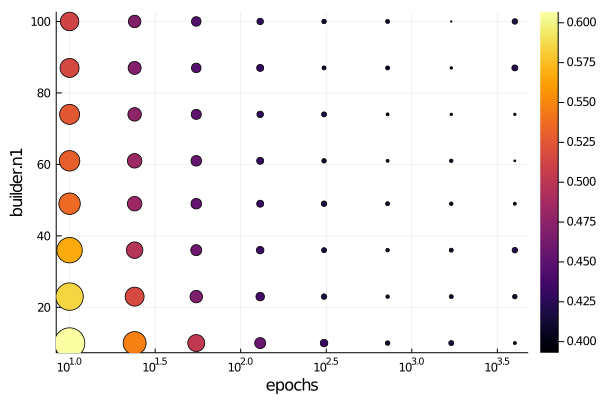

In [48]:
plot(self_tuning_nn)

In [49]:
best = fitted_params(self_tuning_nn)
best

(best_model = NeuralNetworkClassifier{CustomNN,…} @362,
 best_fitted_params = (chain = Chain(Chain(Dense(41, 100, σ), Dense(100, 2, σ)), softmax),),)

In [50]:
best.best_model

NeuralNetworkClassifier(
    builder = CustomNN(
            n1 = 100),
    finaliser = NNlib.softmax,
    optimiser = ADAM(0.0003333333333333333, (0.9, 0.999), IdDict{Any,Any}()),
    loss = Flux.crossentropy,
    epochs = 1700,
    batch_size = 16,
    lambda = 0.01,
    alpha = 0.0,
    optimiser_changes_trigger_retraining = false) @362

In [51]:
best_loss = z.report.best_result.measurement[1]

0.39305457f0

In [52]:
best_n1 = best.best_model.builder.n1

100

In [53]:
fn = "Figures/Grid_NN_$(param1):$(best.best_model.epochs)_x_$(param2):$(best_n1)_bestloss:$(best_loss)"
f = replace(fn,'.' => ',')
png(f)

### GridSearch for Learning Rate

In [58]:
nn = NeuralNetworkClassifier(builder=CustomNN(best_n1))

NeuralNetworkClassifier(
    builder = CustomNN(
            n1 = 100),
    finaliser = NNlib.softmax,
    optimiser = ADAM(0.001, (0.9, 0.999), IdDict{Any,Any}()),
    loss = Flux.crossentropy,
    epochs = 10,
    batch_size = 1,
    lambda = 0.0,
    alpha = 0.0,
    optimiser_changes_trigger_retraining = false) @361

In [59]:
nn.optimiser.eta = 0.001
nn.epochs = 60
nn.batch_size = batch_sz
nn.lambda = 0.01

0.01

In [60]:
Net = machine(nn, X_stand, y)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @361`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


Machine{NeuralNetworkClassifier{CustomNN,…}} @572 trained 0 times.
  args: 
    1:	Source @961 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @784 ⏎ `AbstractArray{Multiclass{2},1}`


In [61]:
fit!(Net, rows=train, verbosity=1, force=true)

┌ Info: Training Machine{NeuralNetworkClassifier{CustomNN,…}} @572.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
Optimising neural net:100%[=========================] Time: 0:00:01


Machine{NeuralNetworkClassifier{CustomNN,…}} @572 trained 1 time.
  args: 
    1:	Source @961 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @784 ⏎ `AbstractArray{Multiclass{2},1}`


In [63]:
param1 = :epochs
param2 = :(optimiser.eta)

r1 = range(nn, param1, lower=10, upper=2000, scale=:linear)
r2 = range(nn, param2, lower=0.0001, upper=0.1, scale=:log10)

MLJBase.NumericRange(Float64, :(optimiser.eta), ... )

In [64]:
self_tuning_nn_model = TunedModel(model=nn,
                                    tuning=Grid(goal=50),
                                    resampling=Holdout(fraction_train=0.7), 
                                    measure=cross_entropy,
                                    acceleration=CPUThreads(),
                                    range=[r1, r2])

ProbabilisticTunedModel(
    model = NeuralNetworkClassifier(
            builder = CustomNN @024,
            finaliser = NNlib.softmax,
            optimiser = ADAM(0.001, (0.9, 0.999), IdDict{Any,Any}()),
            loss = Flux.crossentropy,
            epochs = 60,
            batch_size = 16,
            lambda = 0.01,
            alpha = 0.0,
            optimiser_changes_trigger_retraining = false),
    tuning = Grid(
            goal = 50,
            resolution = 10,
            shuffle = true,
            rng = Random._GLOBAL_RNG()),
    resampling = Holdout(
            fraction_train = 0.7,
            shuffle = false,
            rng = Random._GLOBAL_RNG()),
    measure = cross_entropy(
            eps = 2.220446049250313e-16),
    weights = nothing,
    operation = MLJModelInterface.predict,
    range = MLJBase.NumericRange{T,MLJBase.Bounded,Symbol} where T[NumericRange{Int64,…} @209, NumericRange{Float64,…} @977],
    train_best = true,
    repeats = 1,
    n = nothing,

In [65]:
self_tuning_nn = machine(self_tuning_nn_model, X_stand, y)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=ProbabilisticTunedModel{Grid,…} @865`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


Machine{ProbabilisticTunedModel{Grid,…}} @547 trained 0 times.
  args: 
    1:	Source @421 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @260 ⏎ `AbstractArray{Multiclass{2},1}`


In [66]:
z = fit!(self_tuning_nn, rows=train)

┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @547.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
┌ Info: Attempting to evaluate 49 models.
└ @ MLJTuning /home/andrew/.julia/packages/MLJTuning/Bbgvk/src/tuned_models.jl:494
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=Resampler{Holdout,…} @831`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 49 metamodels:   0%[>                        ]  ETA: N/A┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @257`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(Abstra

Machine{ProbabilisticTunedModel{Grid,…}} @547 trained 1 time.
  args: 
    1:	Source @421 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @260 ⏎ `AbstractArray{Multiclass{2},1}`


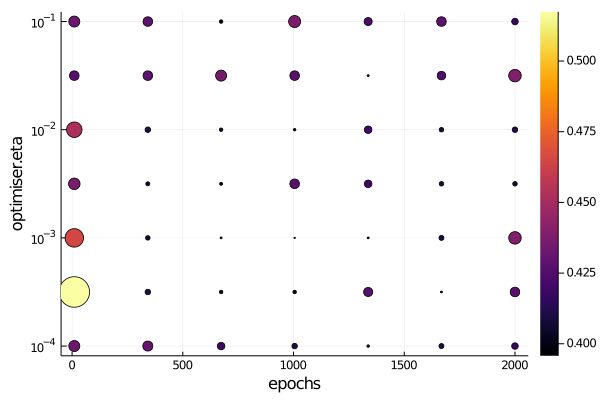

In [67]:
plot(self_tuning_nn)

In [68]:
best = fitted_params(self_tuning_nn)
best

(best_model = NeuralNetworkClassifier{CustomNN,…} @803,
 best_fitted_params = (chain = Chain(Chain(Dense(41, 100, σ), Dense(100, 2, σ)), softmax),),)

In [69]:
best.best_model

NeuralNetworkClassifier(
    builder = CustomNN(
            n1 = 100),
    finaliser = NNlib.softmax,
    optimiser = ADAM(0.001, (0.9, 0.999), IdDict{Any,Any}()),
    loss = Flux.crossentropy,
    epochs = 1005,
    batch_size = 16,
    lambda = 0.01,
    alpha = 0.0,
    optimiser_changes_trigger_retraining = false) @803

In [70]:
best_loss = z.report.best_result.measurement[1]

0.3957463f0

In [71]:
best_eta = round(best.best_model.optimiser.eta, digits=5)

0.001

In [72]:
fn = "Figures/Grid_NN_$(param1):$(best.best_model.epochs)_x_$(param2):$(best_eta)_bestloss:$(best_loss)_hidden:$b"
png(replace(fn,'.' => ','))

### GridSearch for Regularization

In [73]:
nn = NeuralNetworkClassifier(builder=CustomNN(best_n1))

NeuralNetworkClassifier(
    builder = CustomNN(
            n1 = 100),
    finaliser = NNlib.softmax,
    optimiser = ADAM(0.001, (0.9, 0.999), IdDict{Any,Any}()),
    loss = Flux.crossentropy,
    epochs = 10,
    batch_size = 1,
    lambda = 0.0,
    alpha = 0.0,
    optimiser_changes_trigger_retraining = false) @210

In [74]:
nn.optimiser.eta = best_eta
nn.epochs = 60
nn.batch_size = batch_sz
nn.lambda = 0.01

0.01

In [75]:
Net = machine(nn, X_stand, y)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @210`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


Machine{NeuralNetworkClassifier{CustomNN,…}} @812 trained 0 times.
  args: 
    1:	Source @594 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @284 ⏎ `AbstractArray{Multiclass{2},1}`


In [76]:
param1 = :epochs
param2 = :lambda

r1 = range(nn, param1, lower=100, upper=2000, scale=:linear)
r2 = range(nn, param2, lower=0.0001, upper=10, scale=:log10)

MLJBase.NumericRange(Float64, :lambda, ... )

In [77]:
self_tuning_nn_model = TunedModel(model=nn,
                                    tuning=Grid(goal=50),
                                    resampling=Holdout(fraction_train=0.7), 
                                    measure=cross_entropy,
                                    acceleration=CPUThreads(),
                                    range=[r1, r2])

ProbabilisticTunedModel(
    model = NeuralNetworkClassifier(
            builder = CustomNN @302,
            finaliser = NNlib.softmax,
            optimiser = ADAM(0.001, (0.9, 0.999), IdDict{Any,Any}()),
            loss = Flux.crossentropy,
            epochs = 60,
            batch_size = 16,
            lambda = 0.01,
            alpha = 0.0,
            optimiser_changes_trigger_retraining = false),
    tuning = Grid(
            goal = 50,
            resolution = 10,
            shuffle = true,
            rng = Random._GLOBAL_RNG()),
    resampling = Holdout(
            fraction_train = 0.7,
            shuffle = false,
            rng = Random._GLOBAL_RNG()),
    measure = cross_entropy(
            eps = 2.220446049250313e-16),
    weights = nothing,
    operation = MLJModelInterface.predict,
    range = MLJBase.NumericRange{T,MLJBase.Bounded,Symbol} where T[NumericRange{Int64,…} @132, NumericRange{Float64,…} @932],
    train_best = true,
    repeats = 1,
    n = nothing,

In [78]:
self_tuning_nn = machine(self_tuning_nn_model, X_stand, y)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=ProbabilisticTunedModel{Grid,…} @139`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


Machine{ProbabilisticTunedModel{Grid,…}} @148 trained 0 times.
  args: 
    1:	Source @043 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @048 ⏎ `AbstractArray{Multiclass{2},1}`


In [79]:
z = fit!(self_tuning_nn, rows=train)

┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @148.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
┌ Info: Attempting to evaluate 49 models.
└ @ MLJTuning /home/andrew/.julia/packages/MLJTuning/Bbgvk/src/tuned_models.jl:494
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=Resampler{Holdout,…} @569`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 49 metamodels:   0%[>                        ]  ETA: N/A┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @040`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(Abstra

Machine{ProbabilisticTunedModel{Grid,…}} @148 trained 1 time.
  args: 
    1:	Source @043 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @048 ⏎ `AbstractArray{Multiclass{2},1}`


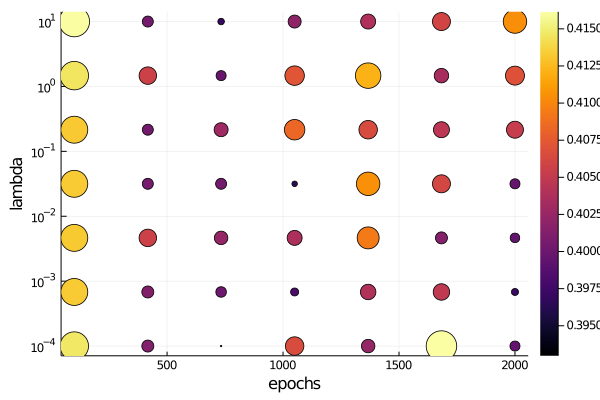

In [80]:
plot(self_tuning_nn)

In [81]:
best = fitted_params(self_tuning_nn)
best

(best_model = NeuralNetworkClassifier{CustomNN,…} @239,
 best_fitted_params = (chain = Chain(Chain(Dense(41, 100, σ), Dense(100, 2, σ)), softmax),),)

In [82]:
best.best_model

NeuralNetworkClassifier(
    builder = CustomNN(
            n1 = 100),
    finaliser = NNlib.softmax,
    optimiser = ADAM(0.001, (0.9, 0.999), IdDict{Any,Any}()),
    loss = Flux.crossentropy,
    epochs = 733,
    batch_size = 16,
    lambda = 0.0001,
    alpha = 0.0,
    optimiser_changes_trigger_retraining = false) @239

In [83]:
best_loss = z.report.best_result.measurement[1]

0.39297703f0

In [84]:
best_lambda = best.best_model.lambda

0.0001

In [85]:
fn = "Figures/Grid_NN_$(param1):$(best.best_model.epochs)_x_$(param2):$(best_lambda)_bestloss:$(best_loss)"
png(replace(fn,'.' => ','))

### Learning Curve

In [86]:
lc_model = NeuralNetworkClassifier(builder=CustomNN(best_n1))
lc_model.optimiser.eta = best_eta;
lc_model.lambda = best_lambda
lc_model.epochs = max_epochs
lc_model.batch_size = batch_sz
lc_model

NeuralNetworkClassifier(
    builder = CustomNN(
            n1 = 100),
    finaliser = NNlib.softmax,
    optimiser = ADAM(0.001, (0.9, 0.999), IdDict{Any,Any}()),
    loss = Flux.crossentropy,
    epochs = 2000,
    batch_size = 16,
    lambda = 0.0001,
    alpha = 0.0,
    optimiser_changes_trigger_retraining = false) @779

In [87]:
# lc_model = NeuralNetworkClassifier(builder=CustomNN(80,80))
# lc_model.optimiser.eta = 0.001;
# lc_model.lambda = best_lambda
# lc_model.epochs = 3000
# lc_model.batch_size = 8

In [88]:
mce(x,y) = mean(cross_entropy(x,y))

mce (generic function with 1 method)

In [90]:
data_schedule, training_losses, valid_losses = learn_curve(lc_model, X[train,:], y[train], mce, step=10)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (10, 0.31339258f0, 0.5995752f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (20, 0.31336236f0, 0.57163495f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (30, 0.31331408f0, 0.5532242f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (40, 0.3142717f0, 0.5336073f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (50, 0.31401017f0, 0.5616377f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (60, 0.33051202f0, 0.5327568f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (70, 0.34195313f0, 0.5514258f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (80, 0.35098657f0, 0.5303565f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (90, 0.34661934f0, 0.5393594f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (100, 0.35334337f0, 0.507861f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (110, 0.34970933f0, 0.49409914f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (120, 0.35496676f0, 0.48743424f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (130, 0.35173973f0, 0.4953111f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (140, 0.34901357f0, 0.5032582f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (150, 0.34664077f0, 0.45610437f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (160, 0.3447063f0, 0.47773707f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (170, 0.34860063f0, 0.48240337f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (180, 0.3466258f0, 0.48533368f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (190, 0.34485948f0, 0.4838639f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (200, 0.35828575f0, 0.4774353f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (210, 0.3466128f0, 0.4717099f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (220, 0.35588056f0, 0.487019f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (230, 0.34964287f0, 0.5079548f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (240, 0.3571147f0, 0.4759903f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (250, 0.35072118f0, 0.48063397f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (260, 0.3632617f0, 0.41656846f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (270, 0.36140993f0, 0.4310151f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (280, 0.33112153f0, 0.45159835f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (290, 0.37188238f0, 0.4320263f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (300, 0.34326956f0, 0.44655502f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (310, 0.36810055f0, 0.41113964f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (320, 0.34765047f0, 0.43670702f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (330, 0.36174718f0, 0.4250276f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (340, 0.34561476f0, 0.44075245f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (350, 0.3589772f0, 0.41923496f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (360, 0.330832f0, 0.49478784f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (370, 0.35248545f0, 0.48646715f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (380, 0.36063173f0, 0.44724366f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (390, 0.36267388f0, 0.5219776f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (400, 0.35076427f0, 0.45734292f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (410, 0.3376525f0, 0.47788224f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (420, 0.3346903f0, 0.48616797f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (430, 0.35530183f0, 0.43064567f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (440, 0.3291406f0, 0.5013344f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (450, 0.33548224f0, 0.4546352f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (460, 0.33563605f0, 0.47492358f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (470, 0.3408973f0, 0.47408548f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (480, 0.33409554f0, 0.44677013f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (490, 0.35862944f0, 0.4473726f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (500, 0.33811864f0, 0.45810333f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (510, 0.34020314f0, 0.46077305f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (520, 0.34210804f0, 0.4428296f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (530, 0.34084594f0, 0.4505219f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (540, 0.34135148f0, 0.47168398f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (550, 0.3354369f0, 0.45738417f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (560, 0.3396188f0, 0.46004802f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (570, 0.33915785f0, 0.45436668f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (580, 0.34037465f0, 0.45579213f0)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


(d, train_metric, valid_metric) = (590, 0.33490008f0, 0.4600797f0)


(10:10:590, Any[0.31339258f0, 0.31336236f0, 0.31331408f0, 0.3142717f0, 0.31401017f0, 0.33051202f0, 0.34195313f0, 0.35098657f0, 0.34661934f0, 0.35334337f0  …  0.33811864f0, 0.34020314f0, 0.34210804f0, 0.34084594f0, 0.34135148f0, 0.3354369f0, 0.3396188f0, 0.33915785f0, 0.34037465f0, 0.33490008f0], Any[0.5995752f0, 0.57163495f0, 0.5532242f0, 0.5336073f0, 0.5616377f0, 0.5327568f0, 0.5514258f0, 0.5303565f0, 0.5393594f0, 0.507861f0  …  0.45810333f0, 0.46077305f0, 0.4428296f0, 0.4505219f0, 0.47168398f0, 0.45738417f0, 0.46004802f0, 0.45436668f0, 0.45579213f0, 0.4600797f0])

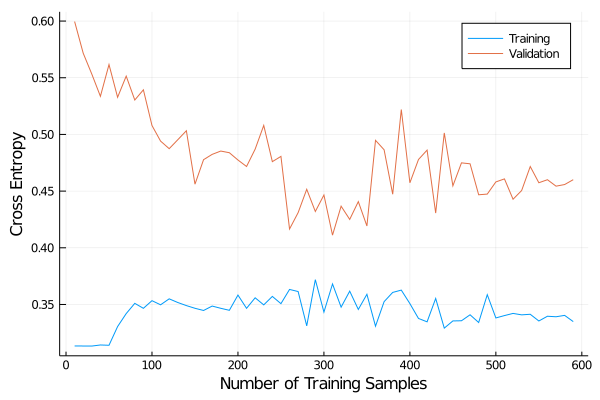

In [91]:
plot(data_schedule, training_losses, label="Training")
plot!(data_schedule, valid_losses, label="Validation")
xlabel!("Number of Training Samples")
ylabel!("Cross Entropy")

In [92]:
png("Figures/loss_curve_NN")

#### Learning Curve

In [93]:
Net = machine(lc_model, X_stand, y)
Net.model.epochs = max_epochs
fit!(Net, rows=train, verbosity=1, force=true)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @779`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Info: Training Machine{NeuralNetworkClassifier{CustomNN,…}} @518.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
Optimising neural net:100%[=========================] Time: 0:00:35


Machine{NeuralNetworkClassifier{CustomNN,…}} @518 trained 1 time.
  args: 
    1:	Source @295 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @952 ⏎ `AbstractArray{Multiclass{2},1}`


In [94]:
nn_acc = evaluate!(Net, resampling=CV(shuffle=true), measure=[cross_entropy, acc], verbosity=1)

Evaluating over 6 folds: 100%[=========================] Time: 0:03:31


┌───────────────┬───────────────┬──────────────────────────────────────────────────┐
│ _.measure     │ _.measurement │ _.per_fold                                       │
├───────────────┼───────────────┼──────────────────────────────────────────────────┤
│ cross_entropy │ 0.45          │ Float32[0.42, 0.478, 0.443, 0.458, 0.438, 0.461] │
│ acc           │ 0.861         │ [0.886, 0.835, 0.869, 0.841, 0.869, 0.863]       │
└───────────────┴───────────────┴──────────────────────────────────────────────────┘
_.per_observation = [[[0.313, 0.313, ..., 0.313], [0.313, 0.313, ..., 0.313], [0.313, 0.313, ..., 1.31], [0.314, 0.313, ..., 0.313], [1.11, 1.31, ..., 0.313], [1.31, 0.313, ..., 0.313]], missing]
_.fitted_params_per_fold = [ … ]
_.report_per_fold = [ … ]


In [134]:
r = range(nn, :epochs, lower=1, upper=2000, scale=:log10)

MLJBase.NumericRange(Int64, :epochs, ... )

In [139]:
curve = MLJ.learning_curve(Net, 
                        range=r, 
#                         resampling=Holdout(fraction_train=0.7), 
                        resampling=CV(nfolds=4), 
                        measure=cross_entropy, 
                        acceleration=CPUProcesses(),
                        resolution=200
)

┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @127.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
┌ Info: Attempting to evaluate 140 models.
└ @ MLJTuning /home/andrew/.julia/packages/MLJTuning/Bbgvk/src/tuned_models.jl:494
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=Resampler{CV,…} @820`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 140 metamodels:   0%[>                        ]  ETA: N/A┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @441`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractA

Evaluating over 140 metamodels:  11%[==>                      ]  ETA: 0:01:08┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @716`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 140 metamodels:  11%[==>                      ]  ETA: 0:01:12┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @748`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 140 metamodels:  12%[===> 

Evaluating over 140 metamodels:  23%[=====>                   ]  ETA: 0:01:56┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @421`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 140 metamodels:  24%[=====>                   ]  ETA: 0:01:58┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @255`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 140 metamodels:  24%[=====

Evaluating over 140 metamodels:  35%[========>                ]  ETA: 0:02:33┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @037`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 140 metamodels:  36%[========>                ]  ETA: 0:02:35┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @410`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 140 metamodels:  36%[=====

Evaluating over 140 metamodels:  47%[===========>             ]  ETA: 0:03:15┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @129`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 140 metamodels:  48%[===========>             ]  ETA: 0:03:17┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @577`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 140 metamodels:  49%[=====

Evaluating over 140 metamodels:  59%[==============>          ]  ETA: 0:03:59┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @913`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 140 metamodels:  60%[===============>         ]  ETA: 0:04:02┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @926`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 140 metamodels:  61%[=====

Evaluating over 140 metamodels:  71%[=================>       ]  ETA: 0:04:32┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @133`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 140 metamodels:  72%[==================>      ]  ETA: 0:04:33┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @686`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 140 metamodels:  73%[=====

Evaluating over 140 metamodels:  84%[====================>    ]  ETA: 0:04:27┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @600`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 140 metamodels:  84%[=====================>   ]  ETA: 0:04:25┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @115`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 140 metamodels:  85%[=====

Evaluating over 140 metamodels:  96%[=======================> ]  ETA: 0:02:05┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @018`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 140 metamodels:  96%[========================>]  ETA: 0:01:48┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @945`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 140 metamodels:  97%[=====

(parameter_name = "epochs",
 parameter_scale = :log10,
 parameter_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  1418, 1473, 1531, 1590, 1652, 1717, 1783, 1853, 1925, 2000],
 measurements = [0.783231258392334, 0.685908854007721, 0.6785063743591309, 0.6733691692352295, 0.677566409111023, 0.6619722247123718, 0.6616408824920654, 0.6446560025215149, 0.6581064462661743, 0.6322696208953857  …  0.5266512036323547, 0.5254709720611572, 0.5278550386428833, 0.5248357653617859, 0.5253816246986389, 0.5276788473129272, 0.5320039987564087, 0.5175420641899109, 0.5371153354644775, 0.5389817357063293],)

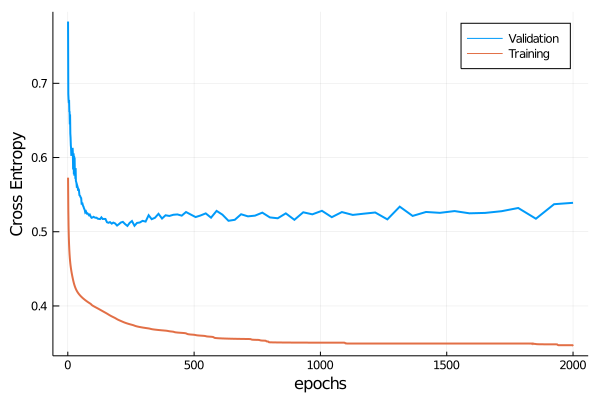

In [140]:
plot(curve.parameter_values,
     curve.measurements,
     xlab=curve.parameter_name,
     ylab="Cross Entropy",
     label="Validation", lw=2)
plot!(Net.report.training_losses, label="Training", lw=2)

In [141]:
best_epochs = curve.parameter_values[argmin(curve.measurements)]

236

In [142]:
png("Figures/learning_curve_nn_$(best_epochs)epochs_balance")

# Final Results

In [143]:
final_model = NeuralNetworkClassifier(builder=CustomNN(best_n1))

NeuralNetworkClassifier(
    builder = CustomNN(
            n1 = 100),
    finaliser = NNlib.softmax,
    optimiser = ADAM(0.001, (0.9, 0.999), IdDict{Any,Any}()),
    loss = Flux.crossentropy,
    epochs = 10,
    batch_size = 1,
    lambda = 0.0,
    alpha = 0.0,
    optimiser_changes_trigger_retraining = false) @051

In [159]:
final_model.optimiser.eta = lc_model.optimiser.eta = best_eta;
final_model.batch_size = batch_sz
final_model.lambda = best_lambda
final_model.epochs = best_epochs

236

### Test Performance

In [153]:
Final_Net = machine(final_model, X_stand, y)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=NeuralNetworkClassifier{CustomNN,…} @051`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


Machine{NeuralNetworkClassifier{CustomNN,…}} @206 trained 0 times.
  args: 
    1:	Source @858 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @715 ⏎ `AbstractArray{Multiclass{2},1}`


In [154]:
fit!(Final_Net, rows=train, force=true, verbosity=1)

┌ Info: Training Machine{NeuralNetworkClassifier{CustomNN,…}} @206.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
Optimising neural net:100%[=========================] Time: 0:00:05


Machine{NeuralNetworkClassifier{CustomNN,…}} @206 trained 1 time.
  args: 
    1:	Source @858 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @715 ⏎ `AbstractArray{Multiclass{2},1}`


In [155]:
nn_acc = evaluate!(Final_Net, resampling=CV(shuffle=true), measure=[cross_entropy, acc], verbosity=1)

Evaluating over 6 folds: 100%[=========================] Time: 0:00:38


┌───────────────┬───────────────┬────────────────────────────────────────────────┐
│ _.measure     │ _.measurement │ _.per_fold                                     │
├───────────────┼───────────────┼────────────────────────────────────────────────┤
│ cross_entropy │ 0.427         │ Float32[0.411, 0.42, 0.424, 0.42, 0.443, 0.44] │
│ acc           │ 0.883         │ [0.903, 0.892, 0.892, 0.886, 0.852, 0.874]     │
└───────────────┴───────────────┴────────────────────────────────────────────────┘
_.per_observation = [[[1.3, 0.332, ..., 0.313], [0.313, 1.31, ..., 0.313], [0.313, 0.313, ..., 0.313], [1.07, 0.313, ..., 0.341], [0.317, 0.313, ..., 0.937], [0.337, 0.313, ..., 0.313]], missing]
_.fitted_params_per_fold = [ … ]
_.report_per_fold = [ … ]


In [156]:
ŷ = MLJ.predict(Final_Net, X_stand[test,:]);

In [157]:
cross_entropy(ŷ, y[test]) |> mean

0.38565686f0

In [158]:
acc(ŷ, y[test])

0.9305993690851735

In [151]:
confusion_matrix(mode.(ŷ), y[test])

┌ Warning: The classes are un-ordered,
│ using: negative='NRB' and positive='RB'.
│ To suppress this warning, consider coercing to OrderedFactor.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/measures/confusion_matrix.jl:83


              ┌───────────────────────────┐
              │       Ground Truth        │
┌─────────────┼─────────────┬─────────────┤
│  Predicted  │     NRB     │     RB      │
├─────────────┼─────────────┼─────────────┤
│     NRB     │     197     │     14      │
├─────────────┼─────────────┼─────────────┤
│     RB      │     13      │     93      │
└─────────────┴─────────────┴─────────────┘


In [132]:
fitted_params(Final_Net)

(chain = Chain(Chain(Dense(41, 100, σ), Dense(100, 2, σ)), softmax),)

In [133]:
report(Final_Net)

(training_losses = Any[0.55796397f0, 0.5163652f0, 0.4968598f0, 0.48419076f0, 0.47470143f0, 0.46723196f0, 0.46123686f0, 0.45635614f0, 0.4523221f0, 0.44893408f0  …  0.36555973f0, 0.3653956f0, 0.365235f0, 0.36507797f0, 0.36492455f0, 0.36477432f0, 0.36462715f0, 0.36448264f0, 0.3643408f0, 0.3642014f0],)